In [374]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [375]:
# load the matches dataset
ipl=pd.read_csv('matches.csv')

In [376]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [377]:
# Finding the number of rows and columns in a data set
ipl.shape

(756, 18)

In [378]:
# Getting the value of most man of the matches
playerofmatch=ipl['player_of_match'].value_counts()

In [379]:
# Getting the top 10n player of the match
MOM = ipl['player_of_match'].value_counts()[0:10]

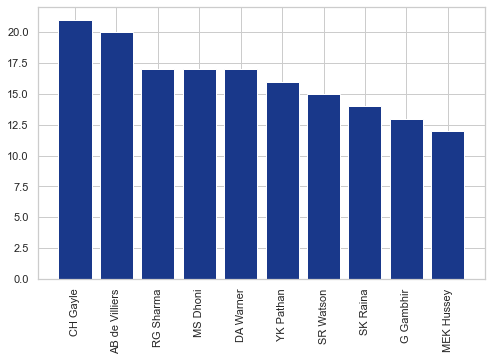

In [380]:
# Creatig a bar plot of top 10 player of the matches
plt.figure(figsize=(8,5))
plt.bar(list(MOM.keys()), list(MOM), color='#19388a')
plt.xticks(rotation=90)
plt.show()

In [381]:
# finding the frequency of results
results=ipl['result'].value_counts()

In [382]:
# Finding the top toss winnig teams
toss=ipl['toss_winner'].value_counts()[:5]

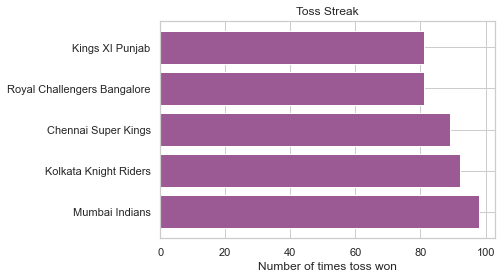

In [383]:
plt.barh(list(toss.keys()), list(toss), color='#9c5a94')
plt.title('Toss Streak')
plt.xlabel('Number of times toss won')
plt.show()

In [384]:
# total number of winners
winner=ipl['winner'].value_counts()[:8]

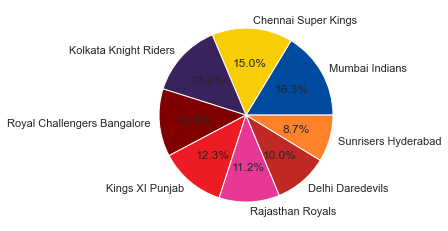

In [385]:
# winnig percentage of top 8 teams in ipl
color=['#004BA0', '#F9CD05', '#3A225D', '#800000', '#ED1B24', '#e73895', '#C02826', '#FF822A']
plt.pie(winner, labels=winner.keys(), autopct='%0.1f%%', radius=1, colors=color)
plt.show()

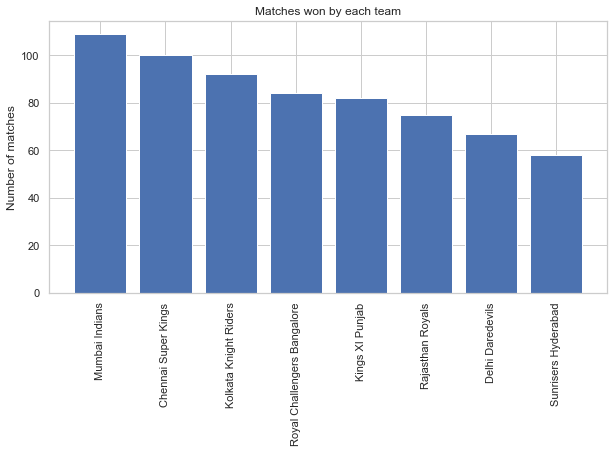

In [386]:
# Most matches won by a team
plt.figure(figsize=(10,5))
plt.bar(list(winner.keys()), winner)
plt.title('Matches won by each team')
plt.ylabel('Number of matches')
plt.xticks(rotation=90)
plt.show()

In [387]:
# Number of teams winnig matches by batting first
batting_first=ipl[ipl['win_by_runs']!=0]

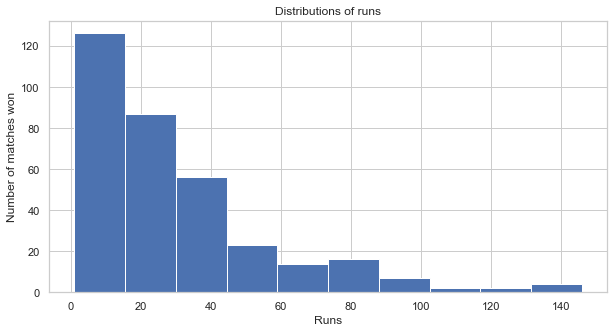

In [388]:
# creating histogram fro batting first winners
plt.figure(figsize=(10,5))
plt.hist(batting_first['win_by_runs'])
plt.title('Distributions of runs')
plt.xlabel('Runs')
plt.ylabel('Number of matches won')
plt.show()

In [389]:
# individual teams winnig matches while batting first
BF_Team=batting_first['winner'].value_counts()[:10]

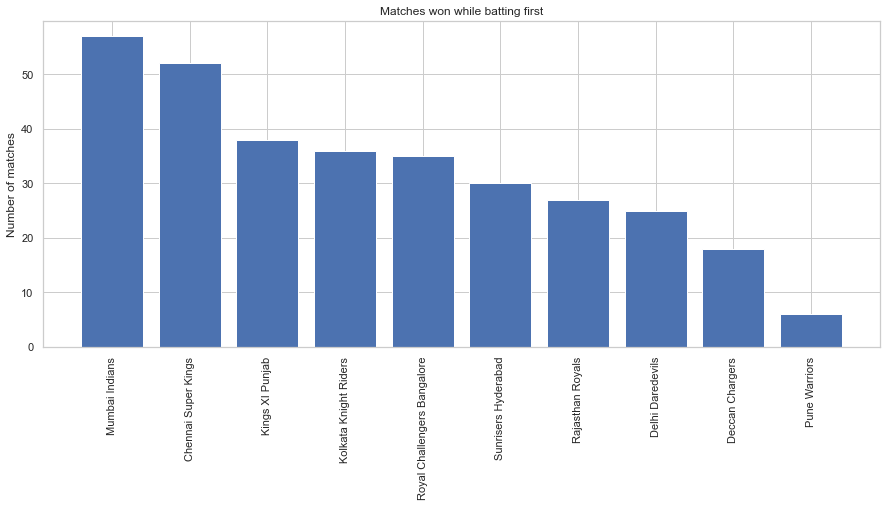

In [390]:
# top 5 batting first winner teams
plt.figure(figsize=(15,6))
plt.bar(list(BF_Team.keys()), list(BF_Team))
plt.xticks(rotation=90)
plt.title('Matches won while batting first')
plt.ylabel('Number of matches')
plt.show()

In [391]:
# Matches won while chasing
bowling_first=ipl[ipl['win_by_wickets']>0]

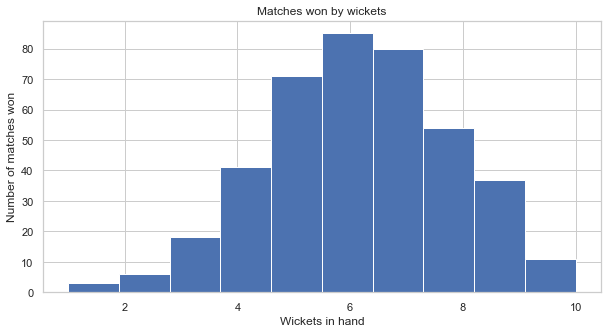

In [392]:
# matches won w.r.t wickets
plt.figure(figsize=(10,5))
plt.hist(bowling_first['win_by_wickets'])
plt.title('Matches won by wickets')
plt.ylabel('Number of matches won')
plt.xlabel('Wickets in hand')
plt.show()

In [393]:
bowl_team=bowling_first['winner'].value_counts()[:8]

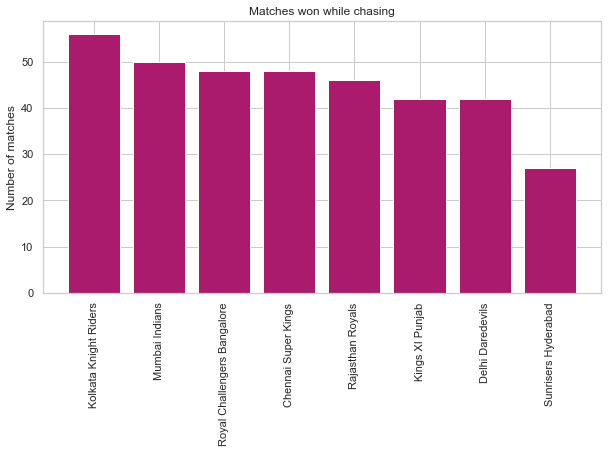

In [394]:
# creating a bar graph for bowling team
plt.figure(figsize=(10,5))
plt.bar(list(bowl_team.keys()), list(bowl_team), color='#aa1b6d')
plt.title('Matches won while chasing')
plt.ylabel('Number of matches')
plt.xticks(rotation=90)
plt.show()

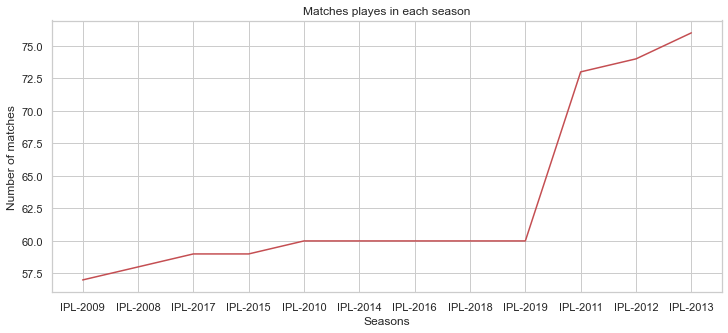

In [395]:
# number of matches played each season
matches=ipl['Season'].value_counts()
match=matches.sort_values()
# line plot for number of matches playes in each season
plt.figure(figsize=(12,5))
plt.plot(list(match.keys()), list(match), color='r')
plt.title('Matches playes in each season')
plt.xlabel('Seasons')
plt.ylabel('Number of matches')
plt.show()

In [396]:
# most matches played in stadium
stadium=ipl['venue'].value_counts()[:10]

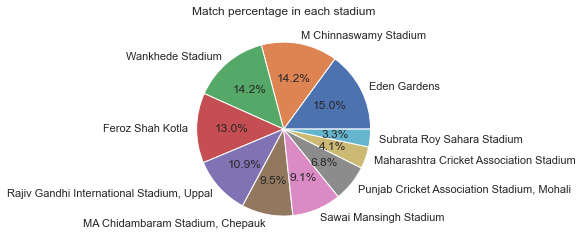

In [397]:
plt.pie(stadium, labels=stadium.keys(), autopct='%0.1f%%', radius=1)
plt.title('Match percentage in each stadium')
plt.show()

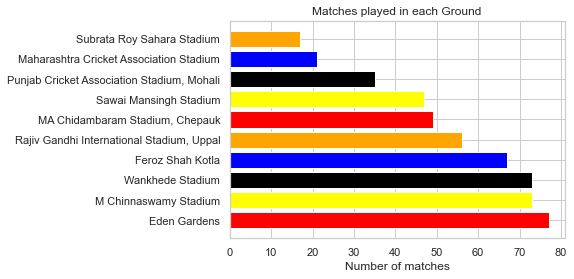

In [398]:
# matches played in each stadium
plt.barh(list(stadium.keys()), list(stadium), color=['red', 'yellow', 'black', 'blue', 'orange'])
plt.title('Matches played in each Ground')
plt.xlabel('Number of matches')
plt.show()

In [399]:
# matches played in each city
city=ipl['city'].value_counts()

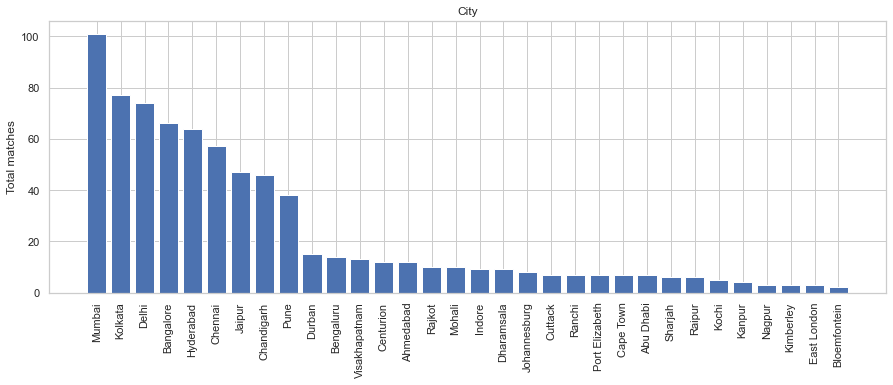

In [400]:
plt.figure(figsize=(15,5))
plt.bar(list(city.keys()), list(city))
plt.title('City')
plt.ylabel('Total matches')
plt.xticks(rotation=90)
plt.show()

In [401]:
# Top runners in ipl history
RAS=pd.read_csv('most_runs_average_strikerate.csv')
Top_Batters=RAS.sort_values(by='total_runs', ascending=False)[:10]

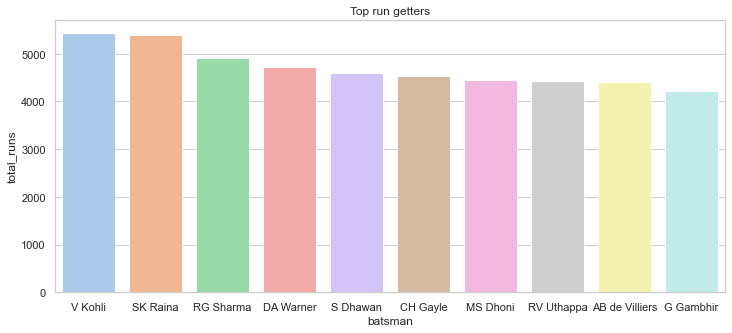

In [402]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,5))
sns.barplot(x='batsman', y='total_runs', data=Top_Batters, palette='pastel')
plt.title('Top run getters')
plt.show()

In [403]:
# Highest Strikerate In IPL 
strikerate=RAS[RAS['total_runs']>1500].sort_values(by=['strikerate'], ascending=False)[:10]

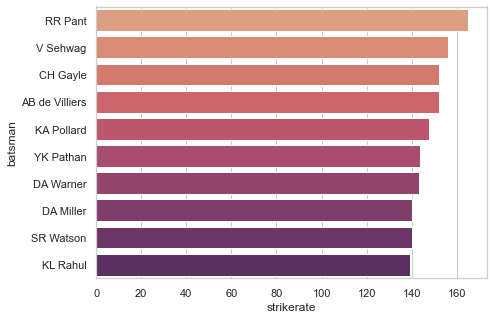

In [404]:
plt.figure(figsize=(7,5))
sns.barplot(y='batsman', x='strikerate', orient='h', data=strikerate, palette='flare')
plt.show()

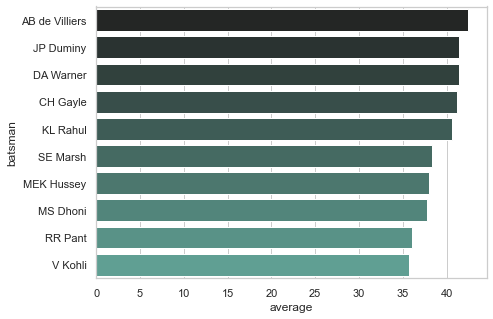

In [405]:
# Highest average
average=RAS[RAS['total_runs']>1500].sort_values(by=['average'], ascending=False)[:10]
plt.figure(figsize=(7,5))
sns.barplot(y='batsman', x='average', orient='h', data=average, palette='dark:#5A9')
plt.show()

In [406]:
# Loading the bowling dataset
Bowling=pd.read_csv('deliveries.csv')

In [407]:
# Dismissal Type
Dismissal_kind=Bowling['dismissal_kind'].value_counts()

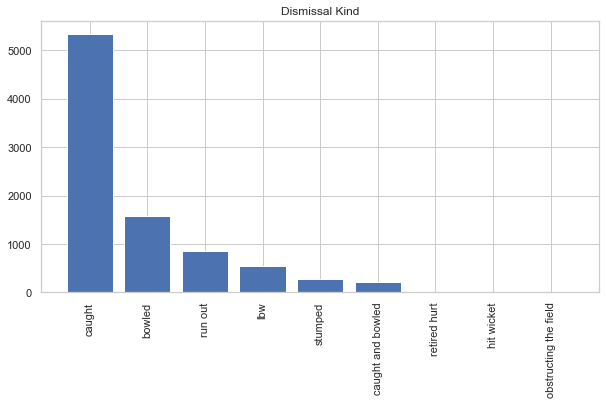

In [408]:
plt.figure(figsize=(10,5))
plt.bar(list(Dismissal_kind.keys()), list(Dismissal_kind))
plt.title('Dismissal Kind')
plt.xticks(rotation=90)
plt.show()

In [409]:
# most balls bowled by a bowler
Most_Balls=Bowling[Bowling['noball_runs']==0]['bowler'].value_counts()[:5]

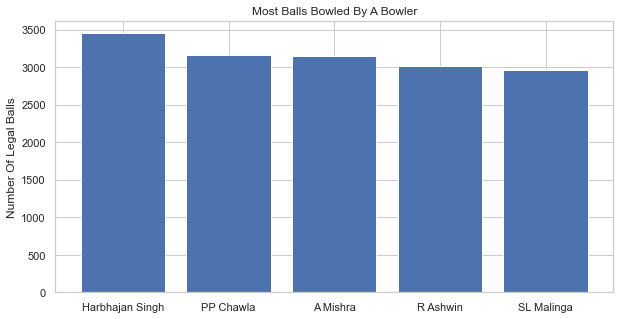

In [410]:
plt.figure(figsize=(10,5))
plt.bar(list(Most_Balls.keys()), list(Most_Balls))
plt.ylabel('Number Of Legal Balls')
plt.title('Most Balls Bowled By A Bowler')
plt.show()

In [411]:
# Getting data for no balls 
No_Balls=Bowling[Bowling['noball_runs']!=0]['bowler'].value_counts()[:5]

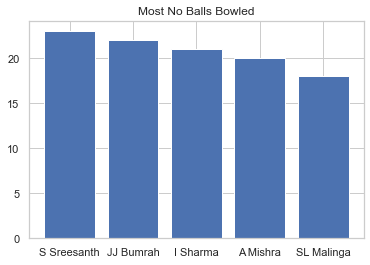

In [412]:
# Most No balls bowled by bowler
plt.bar(list(No_Balls.keys()), list(No_Balls))
plt.title('Most No Balls Bowled')
plt.show()

In [413]:
# Most dot balls
Dot_Balls=Bowling[Bowling['total_runs']==0]['bowler'].value_counts()[:5]

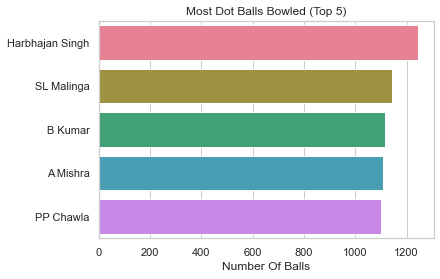

In [414]:
sns.barplot(y=Dot_Balls.keys(), x=Dot_Balls, palette='husl')
plt.xlabel('Number Of Balls')
plt.title('Most Dot Balls Bowled (Top 5)')
plt.show()

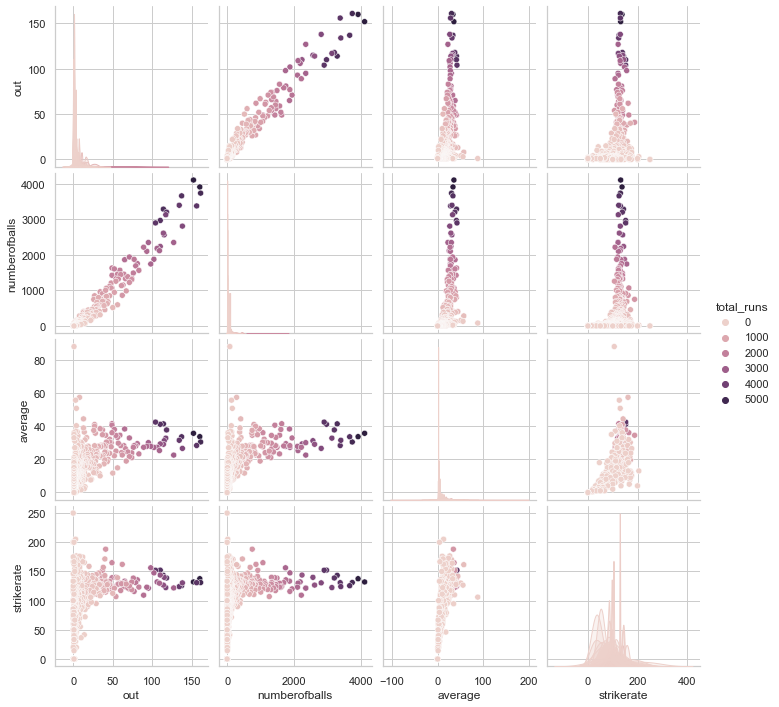

In [415]:
sns.pairplot(RAS, hue='total_runs')
plt.show()

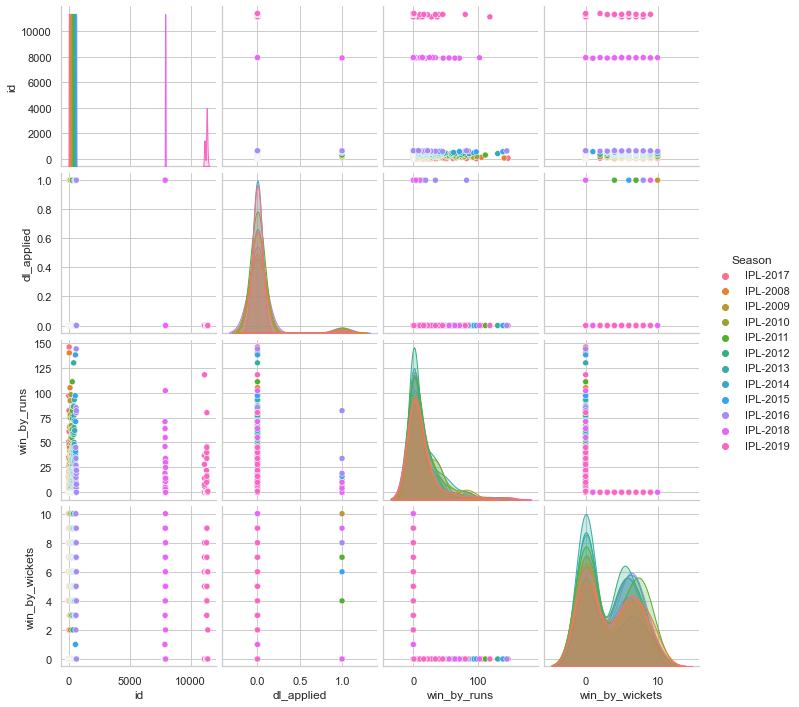

In [416]:
sns.pairplot(ipl, hue='Season')
plt.show()